In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Sample data structure (you'll replace with your actual measurements)
metrics = {
    'Platforms': ['Full-Model (GPU)', 'TFLite Model (GPU)', 'Full-Model (CPU)','TFLite Model (CPU)', 'ArduinoNanoBLE(Est.)'],
    'Inference Time (ms)': [7.5, 63.7, 25.7, 184.6, 511.48]
}


metrics2 = {
    'Platforms': ['GPU', 'TFLite Model', 'Arduino Nano BLE(Est.)'],
    'Memory Usage (MB)': [720, round(2970.2/1024, 2), round(148.5/1024, 2)],  # Example values
    'Power Consumption (W)': [150, 50, 0.003],  # Example values
    'Accuracy (%)': [99, 97, 89]  # Example values
}

df = pd.DataFrame(metrics)
DF2 = pd.DataFrame(metrics2)

<Figure size 800x550 with 0 Axes>

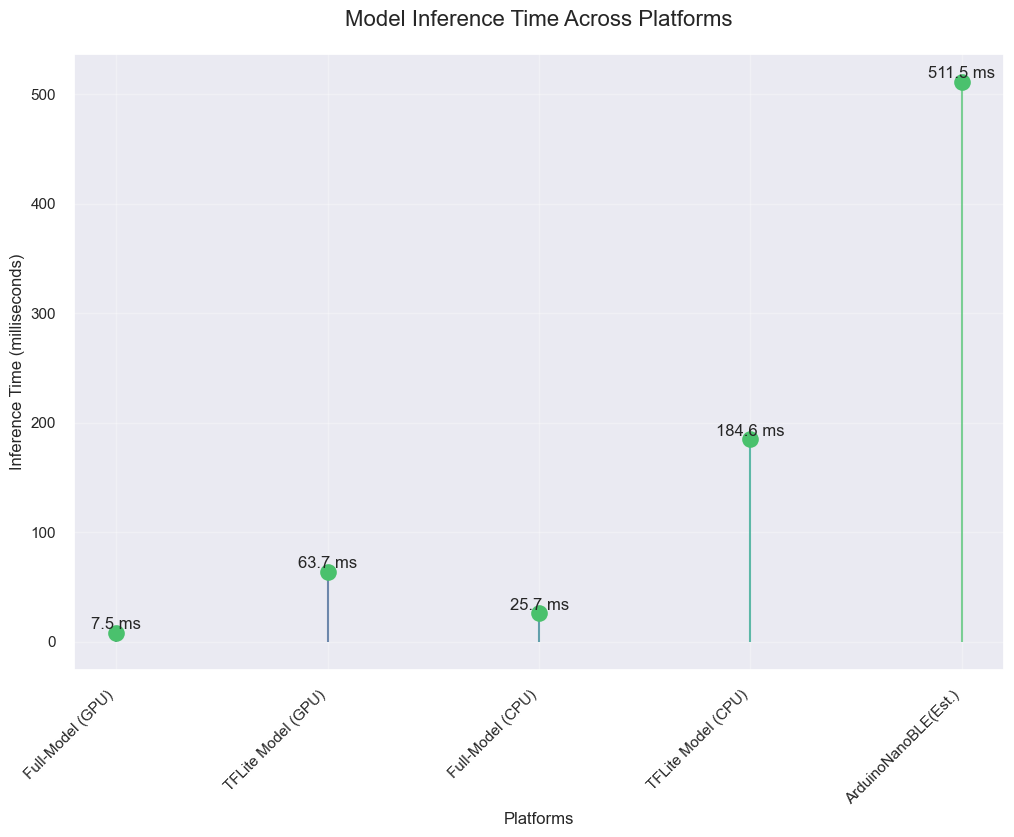

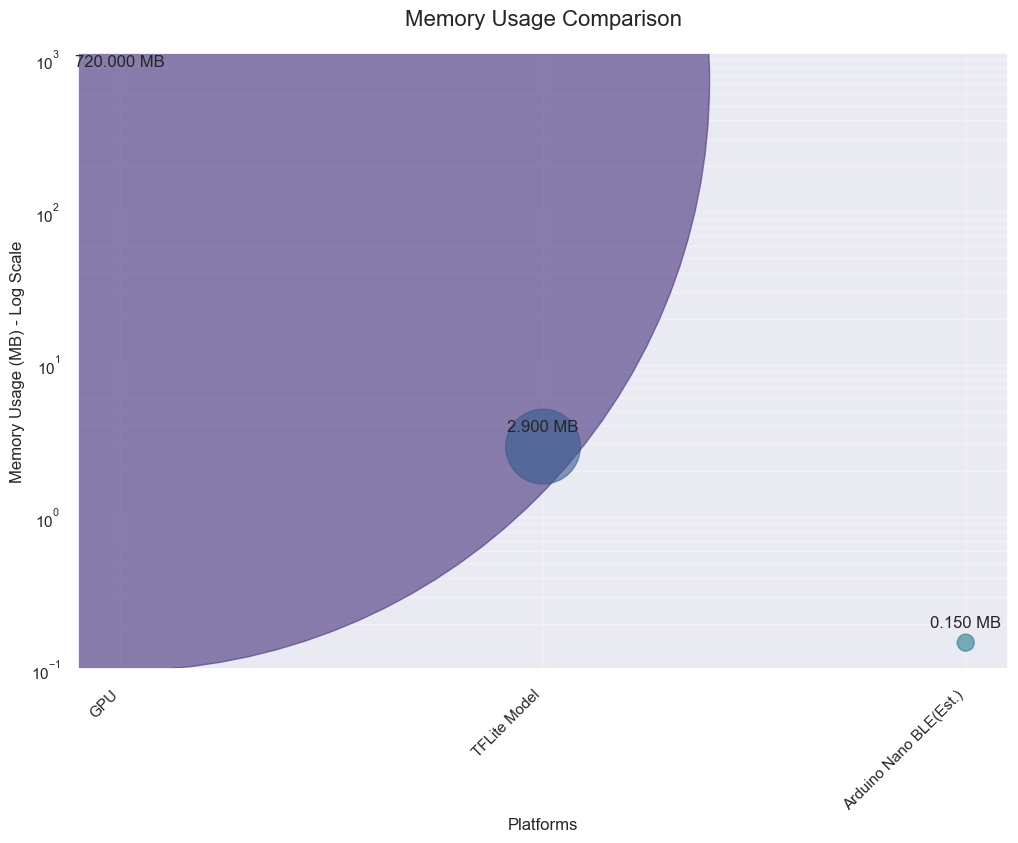

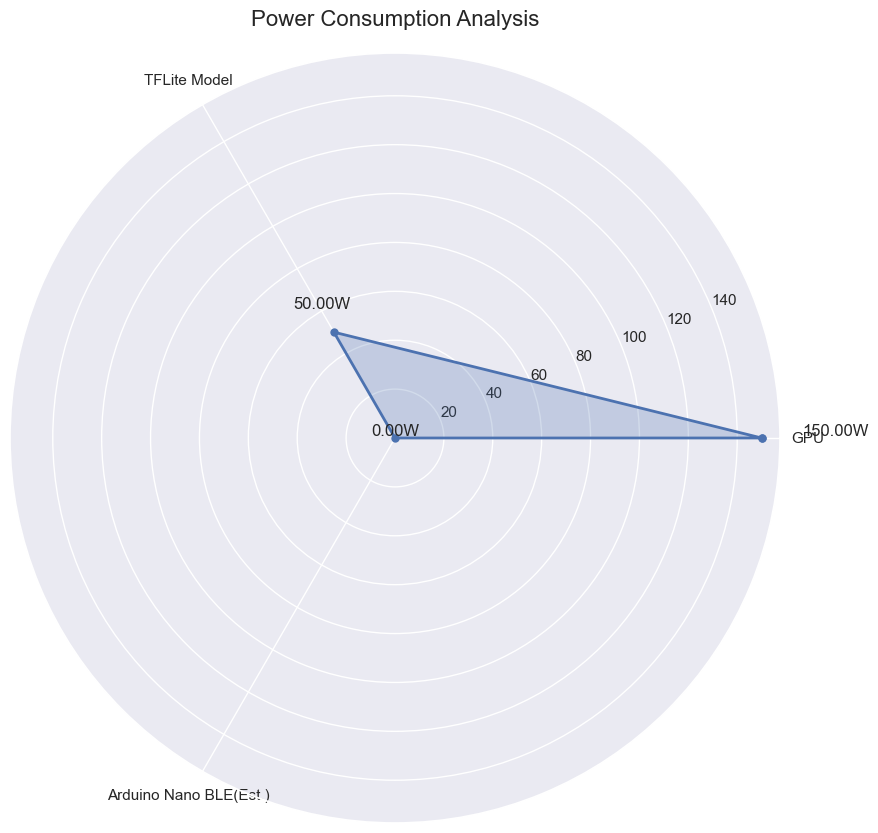

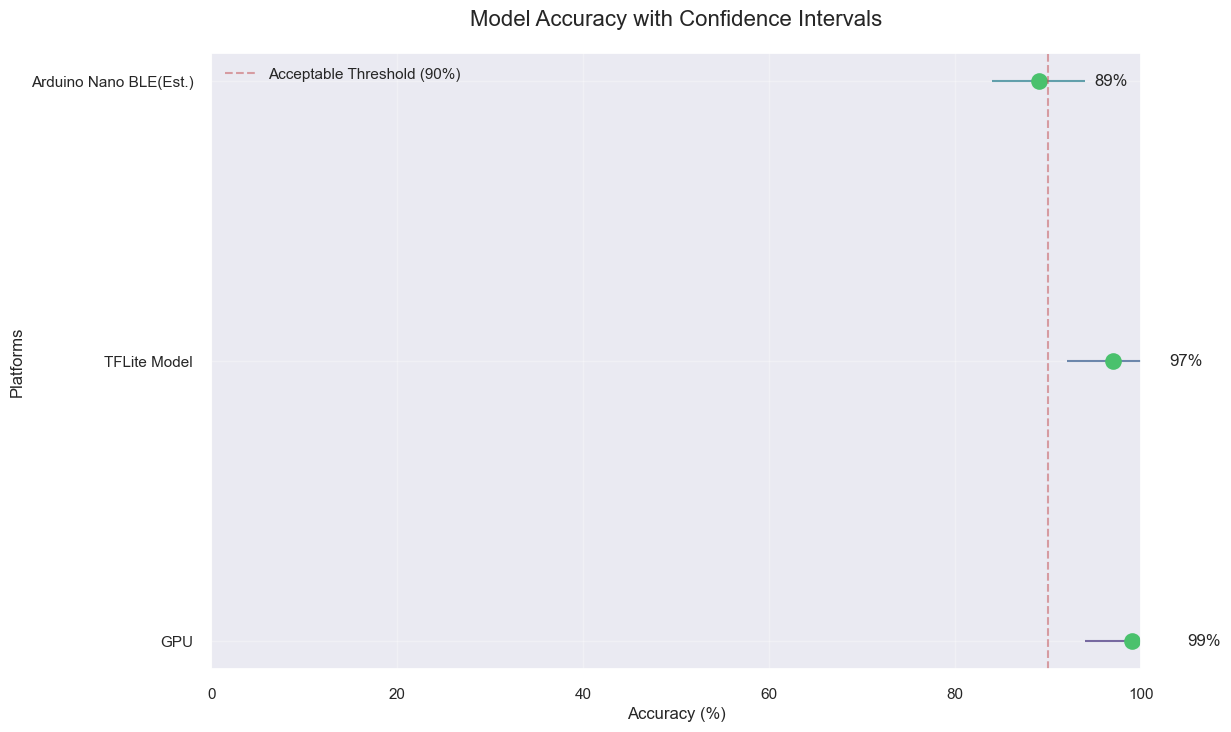

In [ ]:

# Set style correctly
plt.style.use('seaborn-v0_8')  # or use 'seaborn-darkgrid'
sns.set_theme()
colors = sns.color_palette('viridis')

# Clear any existing plots
plt.clf()


# 1. Inference Time - Lollipop Chart
# 1. Inference Time Comparison with gradient colors
plt.figure(figsize=(12, 8))
inference_bars = plt.bar(df['Platforms'], df['Inference Time (ms)'], 
                        color=colors)
plt.title('Model Inference Time Across Platforms', 
          fontsize=16, pad=20)
plt.xlabel('Platforms', fontsize=12)
plt.ylabel('Inference Time (milliseconds)', fontsize=12)

# Add value labels and error bars
for bar in inference_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f} ms',
             ha='center', va='bottom')

plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.savefig('inference_time_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Memory Usage - Bubble Plot
plt.figure(figsize=(12, 8))
sizes = DF2['Memory Usage (MB)'] * 1000  # Scale up for visibility

# Use only the first 3 colors from the palette or a single color
colors_subset = colors[:len(DF2['Platforms'])]  # Take only needed colors
# OR use a single color:
# colors_subset = '#1f77b4'  # Single blue color

plt.scatter(range(len(DF2['Platforms'])), DF2['Memory Usage (MB)'], 
           s=sizes, alpha=0.6, c=colors_subset)
plt.yscale('log')

plt.title('Memory Usage Comparison', fontsize=16, pad=20)
plt.xlabel('Platforms', fontsize=12)
plt.ylabel('Memory Usage (MB) - Log Scale', fontsize=12)

# Add labels
for i, (platform, value) in enumerate(zip(DF2['Platforms'], DF2['Memory Usage (MB)'])):
    plt.text(i, value*1.2, f'{value:.3f} MB', ha='center', va='bottom')

plt.grid(True, which="both", alpha=0.3)
plt.xticks(range(len(DF2['Platforms'])), DF2['Platforms'], rotation=45, ha='right')
plt.ylim(0.1, plt.ylim()[1])
plt.savefig('memory_usage_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Power Consumption - Radar Chart
plt.figure(figsize=(10, 10))
angles = np.linspace(0, 2*np.pi, len(DF2['Platforms']), endpoint=False)
values = DF2['Power Consumption (W)'].values
values = np.concatenate((values, [values[0]]))  # Complete the circle
angles = np.concatenate((angles, [angles[0]]))  # Complete the circle

ax = plt.subplot(111, projection='polar')
ax.plot(angles, values, 'o-', linewidth=2)
ax.fill(angles, values, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(DF2['Platforms'])

plt.title('Power Consumption Analysis', fontsize=16, pad=20)
for angle, value in zip(angles[:-1], values[:-1]):
    plt.text(angle, value*1.2, f'{value:.2f}W', ha='center', va='bottom')

plt.savefig('power_consumption_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Accuracy - Horizontal Range Plot with Confidence Intervals
plt.figure(figsize=(12, 8))
confidence_interval = 5  # Assuming 5% confidence interval

plt.hlines(y=range(len(DF2['Platforms'])), 
          xmin=DF2['Accuracy (%)'] - confidence_interval,
          xmax=DF2['Accuracy (%)'] + confidence_interval,
          color=colors, alpha=0.7)
plt.plot(DF2['Accuracy (%)'], range(len(DF2['Platforms'])), 
         'o', color=colors[-2], markersize=12)

plt.axvline(x=90, color='r', linestyle='--', alpha=0.5, 
            label='Acceptable Threshold (90%)')

plt.title('Model Accuracy with Confidence Intervals', fontsize=16, pad=20)
plt.xlabel('Accuracy (%)', fontsize=12)
plt.ylabel('Platforms', fontsize=12)

# Add value labels
for i, value in enumerate(DF2['Accuracy (%)']):
    plt.text(value+confidence_interval+1, i, f'{value}%', 
             va='center')

plt.grid(True, alpha=0.3)
plt.xlim(0, 100)
plt.legend()
plt.yticks(range(len(DF2['Platforms'])), DF2['Platforms'])
plt.savefig('accuracy_comparison.png', dpi=300, bbox_inches='tight')
plt.show()